In [1]:
import sys
!{sys.executable} -m pip install -q ipywidgets widgetsnbextension
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import torch

%matplotlib inline

In [3]:
from collections import namedtuple
from utils.config_parser import ConfigParser
from train import Trainer

In [4]:
Flags = namedtuple("Flags", ["hyps", "opts"])

In [5]:
FLAGS = Flags("../configs/hyps.json", "../configs/nb_opts.json")

In [6]:
hyps, opts = ConfigParser.parse_configs(FLAGS.hyps, FLAGS.opts)
trainer = Trainer(opts, hyps)

Epoch: 1/6 | Training loss: 0.015633616079886753 | Validation Loss: 0.03407299167853087
Epoch: 2/6 | Training loss: 0.00733561917146047 | Validation Loss: 0.024958621274600638
Epoch: 3/6 | Training loss: 0.005569388084113598 | Validation Loss: 0.01987908886587049
Epoch: 4/6 | Training loss: 0.004595543123781681 | Validation Loss: 0.016988108548870746
Epoch: 5/6 | Training loss: 0.004012107642988364 | Validation Loss: 0.014908907082962228


FileNotFoundError: [Errno 2] No such file or directory: 'outputs/recon.png'

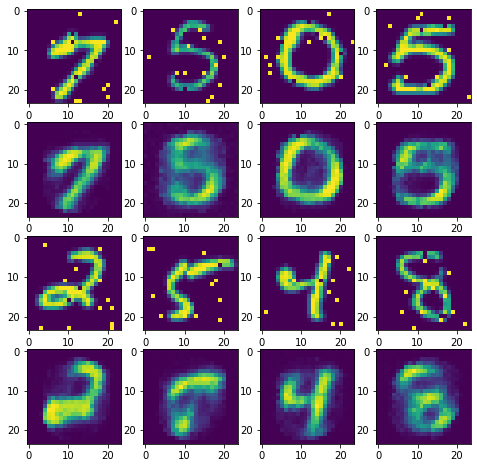

In [7]:
trainer.setup()
trainer.run()

In [39]:
def get_children(model: torch.nn.Module):
    children = list(model.children())
    flatt_children = []
    if children == []:
        return model
    else:
       for child in children:
            try:
                flatt_children.extend(get_children(child))
            except TypeError:
                flatt_children.append(get_children(child))
    return flatt_children

print(get_children(trainer.model.network))

[Flatten(start_dim=1, end_dim=-1), Linear(in_features=576, out_features=128, bias=True), ReLU(), Linear(in_features=128, out_features=576, bias=True), Sigmoid()]


In [42]:

loss = 0
for i in get_children(trainer.model.network):
    print(i)
    values = torch.nn.ReLU((i(img)))
    loss += torch.mean(torch.abs(values))
print(loss)

Flatten(start_dim=1, end_dim=-1)


NameError: name 'img' is not defined

In [8]:
og, _ = next(iter(trainer.val_loader))

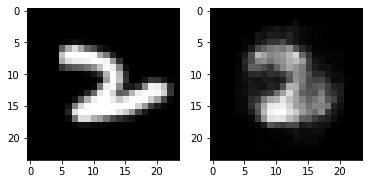

In [9]:
with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.imshow(og[0].squeeze(), cmap="gray")
    img = og.to(trainer.device)
    encoded, recon = trainer.model.network(img)
    plt.subplot(1, 2, 2)
    plt.imshow(recon.cpu().detach()[0].squeeze(), cmap="gray")


In [35]:
first_fc_layer = list(trainer.model.network.encoder.children())[1].weight.cpu().detach()

In [42]:
first_fc_layer.view(-1, 24, 24).shape

torch.Size([128, 24, 24])

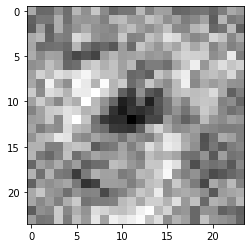

In [48]:

plt.imshow(first_fc_layer.view(-1, 24, 24)[3], cmap='gray');